In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\dell\Downloads\archive (4)\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df1=df.drop_duplicates()

In [8]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [9]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df1['sex']=df1['sex'].map({"female":0,"male":1})

C:\Users\dell\AppData\Local\Temp\ipykernel_9244\88858614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=df1['sex'].map({"female":0,"male":1})


In [11]:
df1['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df1['smoker']=df1['smoker'].map({'yes':0,'no':1})

C:\Users\dell\AppData\Local\Temp\ipykernel_9244\1140070444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['smoker']=df1['smoker'].map({'yes':0,'no':1})


In [13]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df1['region']=df1['region'].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

C:\Users\dell\AppData\Local\Temp\ipykernel_9244\2578936475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region']=df1['region'].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})


In [15]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,2,10600.55
1334,18,0,31.9,0,1,3,2205.98
1335,18,0,36.9,0,1,1,1629.83
1336,21,0,25.8,0,1,0,2007.95


In [18]:
X=df1.iloc[:,6:]
y=df1['expenses']

In [19]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,2,10600.55
1334,18,0,31.9,0,1,3,2205.98
1335,18,0,36.9,0,1,1,1629.83
1336,21,0,25.8,0,1,0,2007.95


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [22]:
y_pred=dtr.predict(X_test)

In [23]:
df1=pd.DataFrame({"Actual":y_test,"dtr":y_pred})

In [24]:
df1

,Actual,dtr
1248,1633.96,1634.57
610,8547.69,8539.67
393,9290.14,9288.03
503,32548.34,32734.19
198,9644.25,9634.54
...,...,...
809,3309.79,3292.53
726,6664.69,6666.24
938,2304.00,2302.30
474,25382.30,25309.49


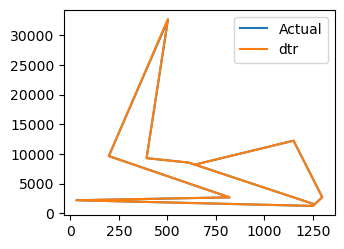

In [25]:
plt.subplot(2,2,1)
plt.plot(df1["Actual"].iloc[0:11], label="Actual")
plt.plot(df1["dtr"].iloc[0:11], label="dtr")
plt.legend()
plt.tight_layout()

In [26]:
rs = metrics.r2_score(y_test, y_pred)

In [27]:
print(rs)


0.9997839171296126


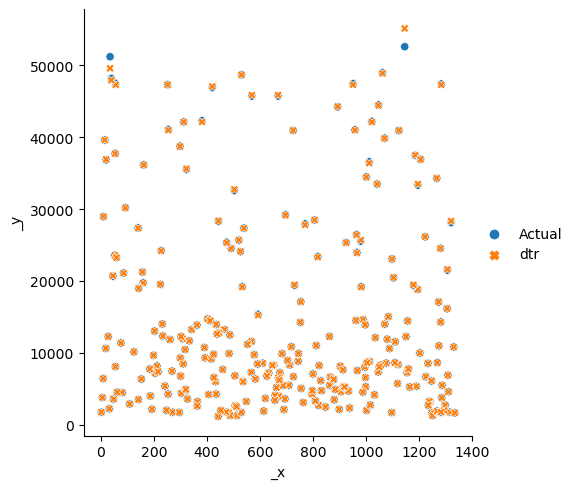

In [30]:
sns.relplot(data=df1)

<AxesSubplot:>

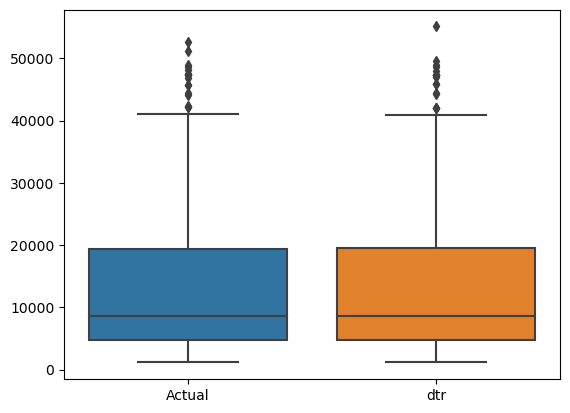

In [32]:
sns.boxplot(data=df1)